In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Aug 23 09:36:15 2024

@author: au605715
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Load the DataFrame
df_base = pd.read_csv(r'../results/processed_data/2_lmem_results/combined_results_base.csv')
df_base.drop(columns=['StdErr', 'z', 'P'], axis=1, inplace=True)

# Load the DataFrame
df_tl = pd.read_csv(r'../results/processed_data/2_lmem_results/combined_results_tl.csv')
df_tl.drop(columns=['StdErr', 'z', 'P'], axis=1, inplace=True)

# Load the DataFrame
df_single = pd.read_csv(r'../results/processed_data/2_lmem_results/combined_results_single.csv')
df_single.drop(columns=['StdErr', 'z', 'P'], axis=1, inplace=True)


In [6]:

w_a_m = True
b_a_m = True
# Split the 'Contrast' column into two separate columns


def extract_group(df, group):
    df[['Group', 'Ratio10']] = df['Contrast'].str.rsplit('_', n=1, expand=True)
    df_group = df[df['Group']== group]
    
    return df_group


if w_a_m == True & b_a_m == True:
    label_base="White_adult_male"
    
    #naive approach
    y_value_gr1 = 2.11#  [1.90 - 2.32]
    y_value_gr1_ci25  = 1.90
    y_value_gr1_ci975 = 2.32
    
    y_value_gr2 = 2.34# [2.12 - 2.56]
    y_value_gr2_ci25  = 2.12
    y_value_gr2_ci975 = 2.56
    
    df_base_gr1 = extract_group(df_base, group="w_a_m")
    df_base_gr2 = extract_group(df_base, group="b_a_m")
    df_tl_gr1 = extract_group(df_tl, group="w_a_m")
    df_tl_gr2 = extract_group(df_tl, group="b_a_m")
    df_single_gr1 = extract_group(df_single, group="w_a_m")
    df_single_gr2 = extract_group(df_single, group="b_a_m")
    group1 = "White"
    group2 = "Black"

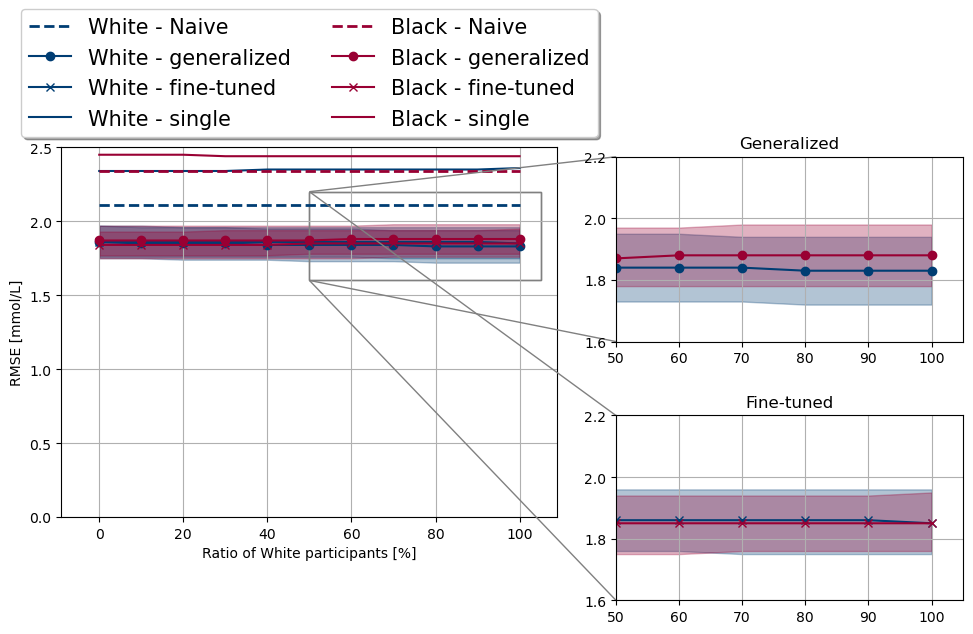

In [46]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

gr1_color = "#003d73"
gr2_color = "#990033"
marker1 = "o"
marker2 = "^"
marker3 = "x"

x = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


# Plot the predictions
fig, ax_lmem = plt.subplots()


# naive
line_naive_gr1, = plt.plot([0, 100], [y_value_gr1, y_value_gr1], color=gr1_color, linestyle='--', linewidth=2, label = f'{group1} - Naive')#, label=f'Group 1 - naive ({round(y_value_gr1, 2)})')
# plt.fill_between(x,y_value_gr1_ci25,y_value_gr1_ci975, color=gr1_color, alpha=0.3)

line_base_gr1 = plt.plot(x, df_base_gr1['Estimate'], marker=marker1, linestyle='-', color = gr1_color, label =  f'{group1} - generalized')
plt.fill_between(x,df_base_gr1['X2.5.'],df_base_gr1['X97.5.'], color=gr1_color, alpha=0.3)

line_tl_gr1 =plt.plot(x, df_tl_gr1['Estimate'], marker=marker3, linestyle='-', color = gr1_color, label = f'{group1} - fine-tuned')
plt.fill_between(x,df_tl_gr1['X2.5.'],df_tl_gr1['X97.5.'], color=gr1_color, alpha=0.3)

line_single_gr1 = plt.plot(x, df_single_gr1['Estimate'], linestyle='-', color = gr1_color, label = f'{group1} - single')
# plt.fill_between(x,df_single_gr1['X2.5.'],df_single_gr1['X97.5.'], color=gr1_color, alpha=0.3)

################

line_naive_gr2, = plt.plot([0, 100], [y_value_gr2, y_value_gr2], color=gr2_color, linestyle='--', linewidth=2, label = f'{group2} - Naive')# , label=f'Group 2 - naive ({round(y_value_gr2, 2)})')
# plt.fill_between(x,y_value_gr2_ci25,y_value_gr2_ci975, color=gr2_color, alpha=0.3)

line_base_gr2 = plt.plot(x, df_base_gr2['Estimate'], marker=marker1, linestyle='-', color = gr2_color,label = f'{group2} - generalized' )
plt.fill_between(x,df_base_gr2['X2.5.'],df_base_gr2['X97.5.'] , color=gr2_color, alpha=0.3)

line_tl_gr2 = plt.plot(x, df_tl_gr2['Estimate'], marker=marker3, linestyle='-', color = gr2_color,label = f'{group2} - fine-tuned' )
plt.fill_between(x,df_tl_gr2['X2.5.'],df_tl_gr2['X97.5.'], color=gr2_color, alpha=0.3)

line_single_gr2 = plt.plot(x, df_single_gr2['Estimate'], linestyle='-', color = gr2_color,label = f'{group2} - single' )
# plt.fill_between(x,df_single_gr2['X2.5.'],df_single_gr2['X97.5.'], color=gr2_color, alpha=0.3)





plt.ylim(0, 2.5)
plt.xlim(-9, 109)


# Add the main legend
handles, labels = ax_lmem.get_legend_handles_labels()
ax_lmem.legend(handles=handles, labels=labels, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2, fancybox=True, shadow=True, fontsize=15)


# ################## Generalized
ax_inset1 = inset_axes(ax_lmem, width="70%", height="50%",
                       bbox_to_anchor=(0.65, 0.7, 1, 1),
                       bbox_transform=ax_lmem.transAxes,
                       loc='lower right', borderpad=-6 )

ax_inset1.plot(x, df_base_gr1['Estimate'], marker=marker1, linestyle='-', color = gr1_color, label = 'White_male_adult - generalized')
ax_inset1.fill_between(x,df_base_gr1['X2.5.'],df_base_gr1['X97.5.'], color=gr1_color, alpha=0.3)

ax_inset1.plot(x, df_base_gr2['Estimate'], marker=marker1, linestyle='-', color = gr2_color,label = 'Black_male_adult - generalized' )
ax_inset1.fill_between(x,df_base_gr2['X2.5.'],df_base_gr2['X97.5.'], color=gr2_color, alpha=0.3)

# Set the zoomed-in region
ax_inset1.set_xlim(50, 105)
ax_inset1.set_ylim(1.6, 2.2)
ax_inset1.set_title("Generalized")
ax_inset1.grid(True)


########### Transfer learned
ax_inset2 = inset_axes(ax_lmem, width="70%", height="50%",
                       bbox_to_anchor=(0.65, 0, 1, 1),
                       bbox_transform=ax_lmem.transAxes,
                       loc='lower right', borderpad=-6 )

ax_inset2.plot(x, df_tl_gr1['Estimate'], marker=marker3, linestyle='-', color = gr1_color, label = 'White_male_adult - fine-tuned')
ax_inset2.fill_between(x, df_tl_gr1['X2.5.'], df_tl_gr1['X97.5.'], color=gr1_color, alpha=0.3)

ax_inset2.plot(x, df_tl_gr2['Estimate'], marker=marker3, linestyle='-', color = gr2_color,label = 'Black_male_adult - fine-tuned' )
ax_inset2.fill_between(x,df_tl_gr2['X2.5.'],df_tl_gr2['X97.5.'], color=gr2_color, alpha=0.3)

# Set the zoomed-in region
ax_inset2.set_xlim(50, 105)
ax_inset2.set_ylim(1.6, 2.2)
ax_inset2.set_title("Fine-tuned")
ax_inset2.grid(True)

# Mark the inset region on the main plot
mark_inset(ax_lmem, ax_inset1, loc1=2, loc2=3, fc="none", ec="0.5")
mark_inset(ax_lmem, ax_inset2, loc1=2, loc2=3, fc="none", ec="0.5")
ax_lmem.set_xlabel('Ratio of White participants [%]')
ax_lmem.set_ylabel('RMSE [mmol/L]')
ax_lmem.grid(True)

# plt.show()
fig.savefig(f'../results/processed_data/2_lmem_results/2_lmem_plot.png', dpi=600, format='png',  bbox_inches='tight')  # Save as high-resolution PNG file
# plt.savefig('../results/processed_data/2_lmem_results/2_lmem_plot.png', dpi=300, bbox_inches='tight')